#Week 5: Regression Improvements and Random Forests

For this week's content, we will start by taking a look at a few ways to improve our linear model from last week which you may have already tried yourself, and then explore different ways to approach this dataset to round it out for this project.

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#various new tools we'll be using for this week! :0
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

url = 'https://github.com/millenopan/DGMI-Project/blob/master/insurance.csv?raw=true'
data = pd.read_csv(url)

In [2]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The first technique we'll be using here is Label Encoding. A similar technique is one hot encoding, but the main idea is that we encode our categorical variables into numbers to represent each value numerically (Smoker: yes/no becomes 1/0)

In [3]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Again, we will pick out X variables to use in our model, and then the y value for prediction. Here, for this walkthrough we'll still be predicting charges.

In [5]:
X = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=83)

In [6]:
display(X_train, y_train, X_test, y_test)

,age,sex,bmi,children,smoker,region
408,38,1,21.120,3,0,2
549,43,0,46.200,0,1,2
947,37,1,34.200,1,1,0
1124,23,0,42.750,1,1,0
1227,42,1,37.180,2,0,2
...,...,...,...,...,...,...
1320,31,1,31.065,3,0,1
1335,18,0,36.850,0,0,2
1280,48,0,33.330,0,0,2
1000,30,1,22.990,2,1,1


408      6652.52880
549     45863.20500
947     39047.28500
1124    40904.19950
1227     7162.01220
           ...     
1320     5425.02335
1335     1629.83350
1280     8283.68070
1000    17361.76610
82      37165.16380
Name: charges, Length: 1070, dtype: float64

,age,sex,bmi,children,smoker,region
665,43,1,38.060,2,1,2
579,25,0,23.465,0,0,0
84,37,0,34.800,2,1,3
244,63,0,27.740,0,1,0
1307,32,1,28.120,4,1,1
...,...,...,...,...,...,...
399,18,0,38.170,0,0,2
1070,37,1,37.070,1,1,2
802,21,1,22.300,1,0,3
439,26,1,29.450,0,0,0


665     42560.43040
579      3206.49135
84      39836.51900
244     29523.16560
1307    21472.47880
           ...     
399      1631.66830
1070    39871.70430
802      2103.08000
439      2897.32350
912     14382.70905
Name: charges, Length: 268, dtype: float64

In [7]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This time, our model 'lreg' will take in multiple variables, including categorical ones such as smoker identification, to predict our charges more accurately. Let's see it in action.

In [8]:
y_pred_train = lreg.predict(X_train)
y_pred_test = lreg.predict(X_test)
lreg.score(X_test,y_test)

0.7628272181176492

------------------------

What is this our "score" function really outputting though? Here, we are actually getting the coefficient of determination, denoted $R^2$, for our prediction.

When it comes to a general statistical model, this value tells us more information regarding the proportion of the variance between the dependent variable that is predictable from the independent variable. From a mathematical perspective, this equates to the following formula:

$R^2$ = 1 - (Residual Sum of Squares / Total Sum of Squares)

Residual Sum of Squares = $\sum (y_{predicted} - y_{actual})^2$

Total Sum of Squares = $\sum (y_{predicted} - \bar{y})^2$

The RSS is the sum of the differences in predicted and observed squared. The TSS is the sum of the difference between the predicted and the mean of the predicted values. Together, this gives us a ratio of how different our observed and actual results may be. Subtracting from 1 gives us how close they are, and we use that as the score here. Although I won't go too much in depth here, feel free to research on your own more about how to better "score" models and rate the accuracy. This method is generally better than looking at something such as the RMSE.

--------------------

Next, we'll introduce another development from how we originally conducted "train_test_splits". The next step is to go through Cross Validation. The main idea is that we separate our full data into blocks for our test and training data, then iterate through each to run multiple iterations, and look at the various scores we get as a result.

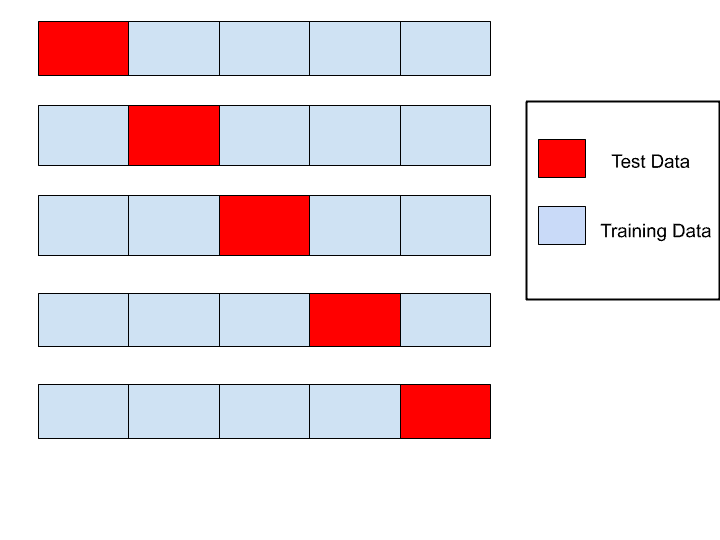

The image above gives a good example of how this might look for 5-fold CV, meaning we will do 5 iterations of testing. We have been doing a train_test_split with 20% as our test set. Here, this would be reflected, where after randomly scrambling our dataset order, we would divide into 5 blocks, and iterate through each to conduct a different score evaluation.

In [9]:
scores = cross_val_score(lreg, X, y, cv=5)
scores

array([0.76123983, 0.70838663, 0.77786772, 0.73365206, 0.7551335 ])

The above array of scores tells us the results for our model. Thus, we have a better metric for the entire accuracy of our linear model instead of just 1 score in the beginning.

In [10]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.05)


And just to check to see how RMSE does compared to last week, we can quickly test here to see.

In [11]:
def root_mean_squared_error(actual, predicted):
  return np.mean((actual-predicted)**2)**0.5

In [12]:
training_error = root_mean_squared_error(y_train, y_pred_train)
test_error = root_mean_squared_error(y_test, y_pred_test)
print("The training error is " + str(training_error) + " and the test error is " + str(test_error))

The training error is 6008.734493950342 and the test error is 6206.217313364386


---------------

This wraps up some smaller new things we built up on last week's content. Let's move forward with different methods! For this week, we will be covering random forests.


Before we jump into random forests, we will start by walking through what a decision tree is. A decision tree is a method in which we separate out and categorize our data based on it's various conditions, and restrict into buckets that satisfy certain properties as one prediction. The example below is for a simple categorical version.

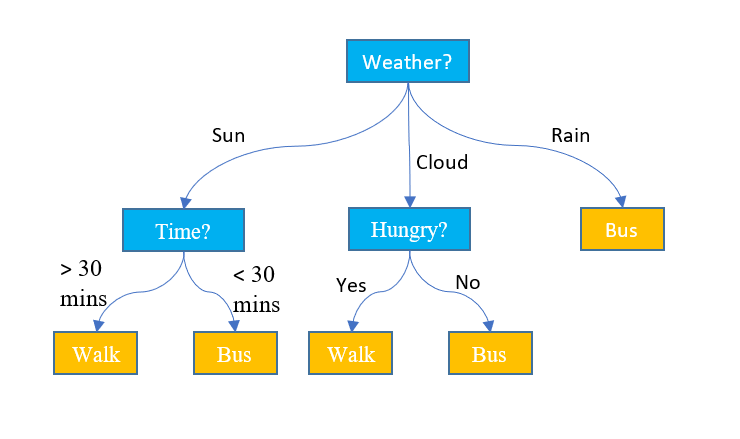

Here, we are taking into account 3 different variables, and then reaching the leaf nodes in yellow to determine the value we output. In our case, we essentially factor into account all the included variables to construct a similar relationship, and have ranges of charges as the result we place our data in.

----------------------------------

One of the main problems with decision trees is that it can often be way too specific and narrow on our data, and end up narrowing it down in a poor way. Thus, we introduce the idea of random forests: The big idea is that we construct decision trees with a bit of randomness, mainly from taking smaller samples within our provided data rather than the whole thing. Then, we compare each mini-decision tree result with one another, and pick the majority branches as the optimal one to keep. Eventually, we narrow it down to a single decision tree once again. This means Random Tree Regression generally more accurate than just doing Decision Tree Regression. Let's see it in action.

In [13]:
X = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=83)
display(X_train, y_train, X_test, y_test)

,age,sex,bmi,children,smoker,region
408,38,1,21.120,3,0,2
549,43,0,46.200,0,1,2
947,37,1,34.200,1,1,0
1124,23,0,42.750,1,1,0
1227,42,1,37.180,2,0,2
...,...,...,...,...,...,...
1320,31,1,31.065,3,0,1
1335,18,0,36.850,0,0,2
1280,48,0,33.330,0,0,2
1000,30,1,22.990,2,1,1


408      6652.52880
549     45863.20500
947     39047.28500
1124    40904.19950
1227     7162.01220
           ...     
1320     5425.02335
1335     1629.83350
1280     8283.68070
1000    17361.76610
82      37165.16380
Name: charges, Length: 1070, dtype: float64

,age,sex,bmi,children,smoker,region
665,43,1,38.060,2,1,2
579,25,0,23.465,0,0,0
84,37,0,34.800,2,1,3
244,63,0,27.740,0,1,0
1307,32,1,28.120,4,1,1
...,...,...,...,...,...,...
399,18,0,38.170,0,0,2
1070,37,1,37.070,1,1,2
802,21,1,22.300,1,0,3
439,26,1,29.450,0,0,0


665     42560.43040
579      3206.49135
84      39836.51900
244     29523.16560
1307    21472.47880
           ...     
399      1631.66830
1070    39871.70430
802      2103.08000
439      2897.32350
912     14382.70905
Name: charges, Length: 268, dtype: float64

In [14]:
rf = RandomForestRegressor(n_estimators = 200, n_jobs = -1) 
# n_estimators = 200 means 200 trees, n_jobs = -1 uses all your CPU cores to compute them
rf.fit(X_train,y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [15]:
scores = cross_val_score(rf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.84 (+/- 0.07)


array([0.85353609, 0.77417461, 0.86988376, 0.83004636, 0.85423826])

In [16]:
training_error = root_mean_squared_error(y_train, rf_pred_train)
test_error = root_mean_squared_error(y_test, rf_pred_test)
print("The training error is " + str(training_error) + " and the test error is " + str(test_error))

The training error is 1776.7442736247594 and the test error is 4990.193385678486


Let's take a side by side look at the first few entries from our testing dataset.

In [17]:
print("Random Forest Results:    ", rf_pred_test[0:4].round(decimals=2))
print("Linear Regression Results:", y_pred_test[0:4].round(decimals=2))
print()
print("Actual:                   ", y_test.values[0:4].round(decimals=2))

Random Forest Results:     [44872.36  4969.13 40152.11 30013.62]
Linear Regression Results: [35531.55  2310.89 32684.72 36836.44]

Actual:                    [42560.43  3206.49 39836.52 29523.17]


We can see that this model does much better than using a Linear Regression Model in terms of overall accuracy, and even in this small sample the random forest gets pretty close to the actual results!